In [52]:
#Standard:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

#Statistics: 

from scipy import stats

#Plotting modules and libraries:

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [70]:
titanic_df = pd.read_csv('train.csv')

In [71]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


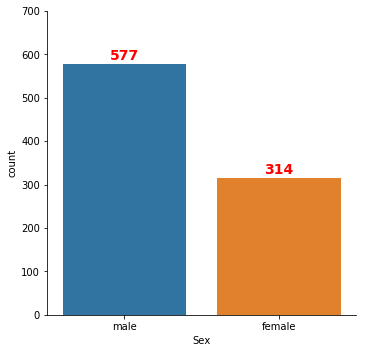

In [55]:
        #Who were the passegers (age,sex)

#Sex :
#Rounding integer to nearest 100th value + 100
def roundup(x):
    return 100 + int(np.ceil(x/100.0))*100



#Category plot
sns.catplot('Sex',data = titanic_df,kind = 'count' )

#Get current axis
ax = plt.gca()

#Set y lim
y_max = titanic_df['Sex'].value_counts().max()
ax.set_ylim([0,roundup(y_max)])

for nr, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(nr,height+20,'{}'.format(int(height)), color = 'red', fontsize = 14, fontweight = 'bold',
           ha=  'center',
           va = 'center')
    



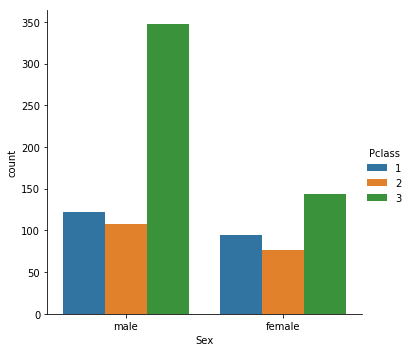

In [29]:
sns.catplot('Sex',data = titanic_df,kind = 'count',hue = 'Pclass')

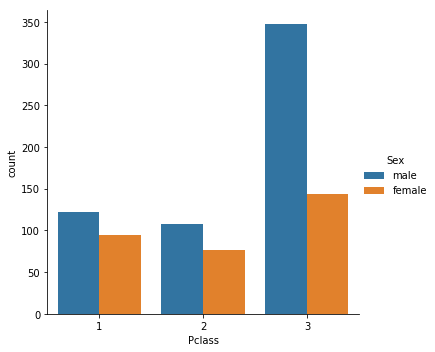

In [30]:
sns.catplot('Pclass',data = titanic_df,kind = 'count',hue = 'Sex')

In [165]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [168]:
titanic_df['Passenger'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [58]:
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


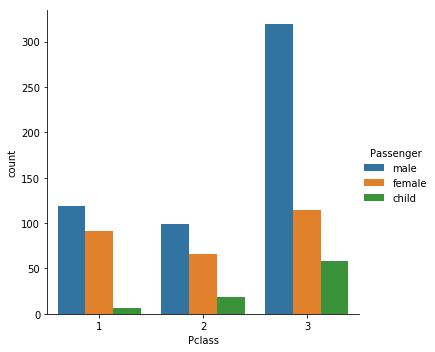

In [169]:
sns.catplot('Pclass',data = titanic_df,kind = 'count',hue = 'Passenger')

Text(0.5, 1.0, 'Distribution of Age')

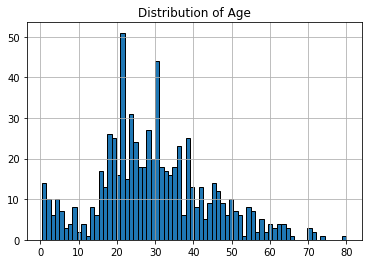

In [60]:
titanic_df.hist('Age',bins = 70, ec = 'k',xlabelsize= 10)
plt.title('Distribution of Age')

In [49]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
titanic_df['Passenger'].value_counts()

male      537
female    271
child      83
Name: Passenger, dtype: int64

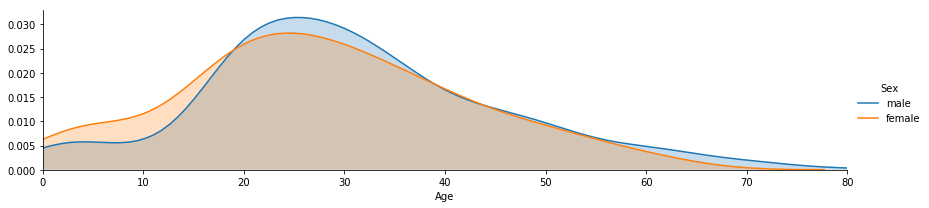

In [65]:
#Facet grid lets you plot multiple graphs. Plotting 2 KDE plots
fig = sns.FacetGrid(titanic_df,hue = 'Sex', aspect =4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()

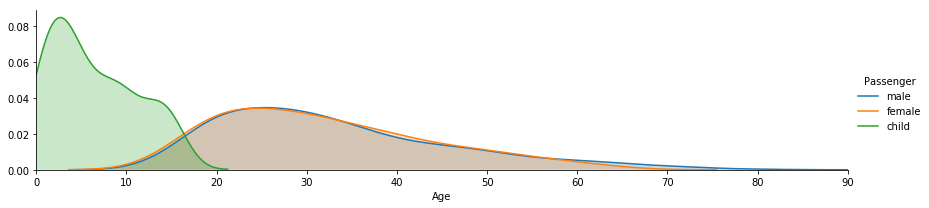

In [66]:
fig2 = sns.FacetGrid(titanic_df,hue = 'Passenger', aspect = 4)
fig2.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig2.set(xlim = (0,oldest + 10))
fig2.add_legend()

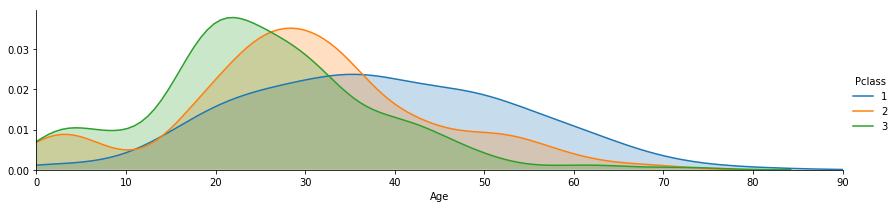

In [67]:
fig3 = sns.FacetGrid(titanic_df,hue = 'Pclass', aspect = 4)
fig3.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig3.set(xlim = (0,oldest + 10))
fig3.add_legend()

In [68]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
titanic_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [186]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [187]:
levels = []

for letter in deck:
    levels.append(letter[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Level']
cabin_df.head()



,Level
0,C
1,C
2,E
3,G
4,C


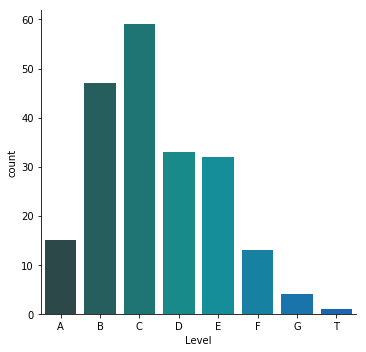

In [91]:
sns.catplot('Level',data = cabin_df, kind  = 'count',palette = 'winter_d')

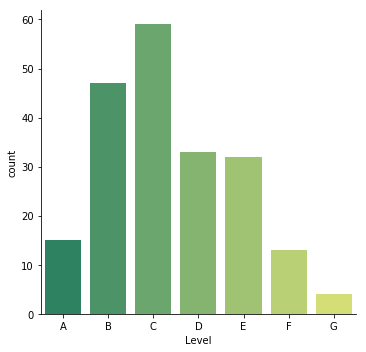

In [93]:
sns.catplot('Level',data = cabin_df[cabin_df.Level != 'T'], kind  = 'count',palette = 'summer')

In [99]:
titanic_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [110]:
embarked_srs = titanic_df['Embarked'].dropna()
embarked_df = DataFrame(data = embarked_srs)

In [111]:
embarked_df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


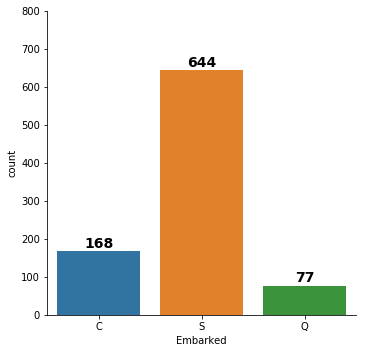

In [119]:
#Where did they come from?

sns.catplot('Embarked',data = embarked_df, kind ='count', order = ['C','S','Q'])


ax = plt.gca()

y_max = embarked_df['Embarked'].value_counts().max()
ax.set_ylim([0,roundup(y_max)])

for nr, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(nr,height+20,'{}'.format(int(height)), color = 'black', fontsize = 14, fontweight = 'bold',
           ha=  'center',
           va = 'center')

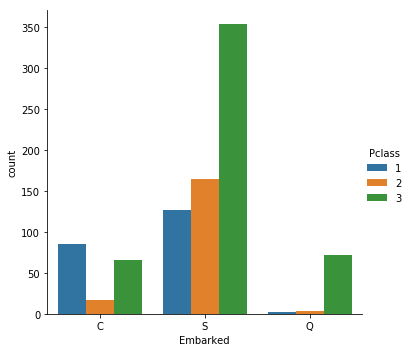

In [121]:
sns.catplot('Embarked',data = titanic_df, kind ='count', hue = 'Pclass', order = ['C','S','Q'])

#This gives us insight into the economics of the cities. Charlestown had equal proportions of 1st class 
# as 3rd class. Q, on the other hand, has a lot of 3rd class passengers

In [122]:
# To see if passengers had family or were alone

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [147]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

In [148]:
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


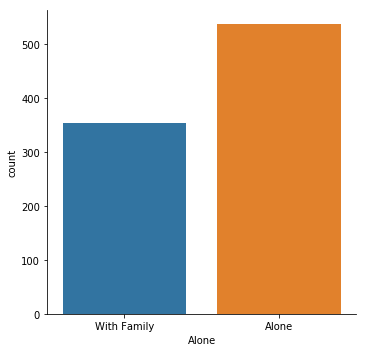

In [149]:
sns.catplot('Alone',data = titanic_df, kind= 'count')

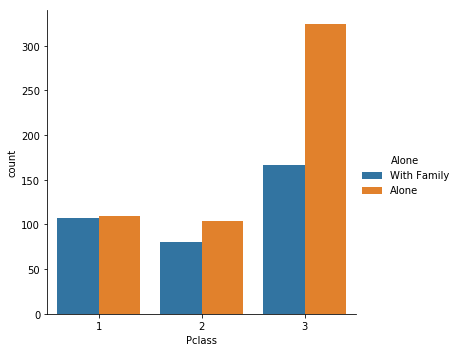

In [153]:
sns.catplot('Pclass',data = titanic_df, kind= 'count', hue = 'Alone')

In [155]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


In [156]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0 : 'No', 1 : 'Yes'})

In [170]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,No,male


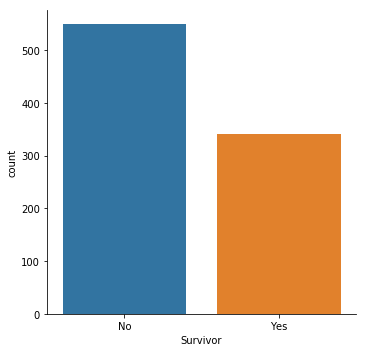

In [158]:
#survival comparison
sns.catplot('Survivor',data = titanic_df, kind = 'count')

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


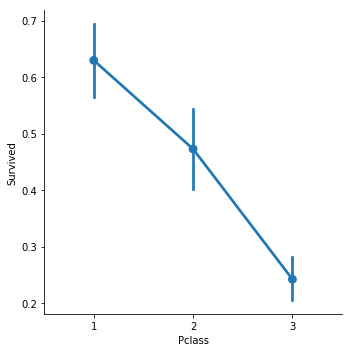

In [163]:
#Did ticket class affect survival?
sns.catplot('Pclass','Survived',data = titanic_df, kind ='point')

#Nothing can be deduced from here because 3rd class had much more men than women and children. 
# So it could just be a fact that more men died in all, thus more people from 3rd class.

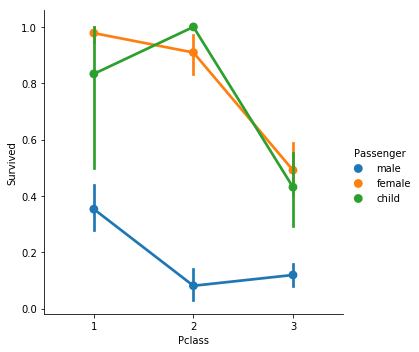

In [171]:
#Did ticket class and gender affect survival?
sns.catplot('Pclass','Survived',hue = 'Passenger', data = titanic_df, kind ='point')

#This shows that 3rd class definitely reduced chances of survival, no matter the gender.
#1st class best for females and males. 2nd class best for children

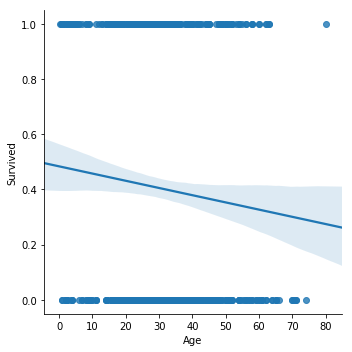

In [175]:
#Did age affect survival?
sns.lmplot('Age','Survived', data = titanic_df)

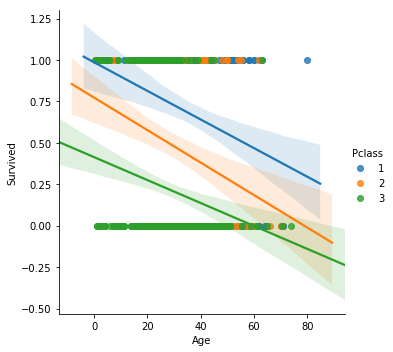

In [176]:
sns.lmplot('Age','Survived', data = titanic_df, hue = 'Pclass')

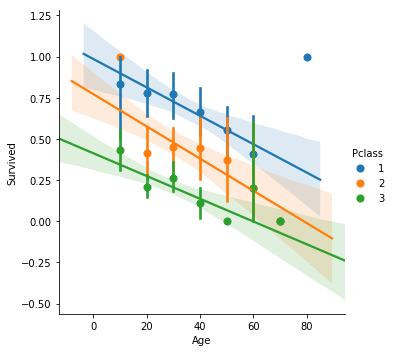

In [181]:
age_groups = [10,20,30,40,50,60,70,80,90]
sns.lmplot('Age','Survived',data = titanic_df, hue ='Pclass', x_bins = age_groups)

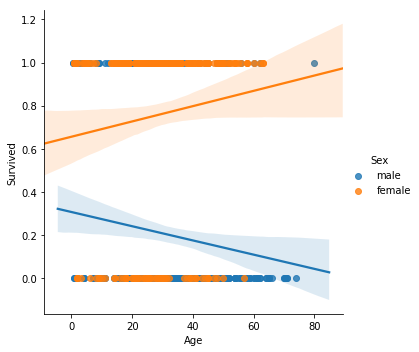

In [180]:
#Age vs survival for males and females. 
#Older females survived more than younger females, but vice-versa for men.
sns.lmplot('Age','Survived', data = titanic_df, hue = 'Sex')

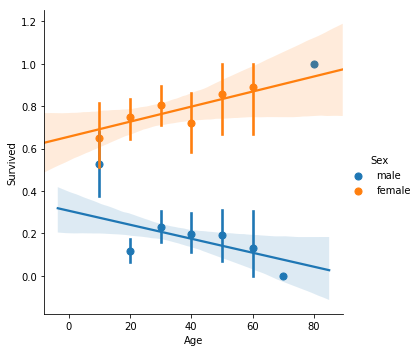

In [182]:
sns.lmplot('Age','Survived', data = titanic_df, hue = 'Sex', x_bins = age_groups)

In [188]:
cabin_df.head()

,Level
0,C
1,C
2,E
3,G
4,C


In [198]:
titanic_df['Cabin_Letter'] = titanic_df['Cabin'].str.get(0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,Passenger,Cabin_Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,No,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,Yes,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Yes,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,Yes,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,No,male,NaN


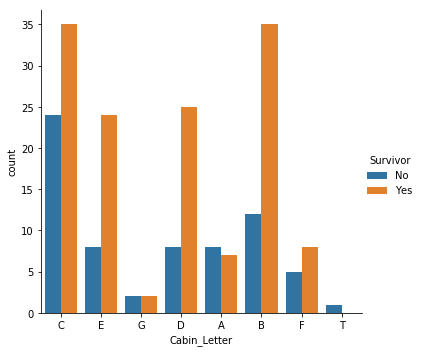

In [200]:
#Did cabin class affect survival rate?
sns.catplot('Cabin_Letter',data = titanic_df, kind = 'count',hue = 'Survivor')

#This indicates a lot of cabins had high ratio of survivors to non-survivors. But this data has only 204 values for 
# cabins. There is a lot of info. lost about non-survivors. Thus , cabin data will have more survivors.

In [202]:
titanic_df['Cabin_Letter'].describe()

count     204
unique      8
top         C
freq       59
Name: Cabin_Letter, dtype: object

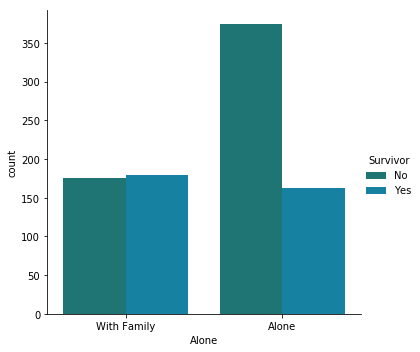

In [203]:
#Did being with family affect survival rate?
sns.catplot('Alone',data = titanic_df, kind = 'count',hue = 'Survivor', palette ='winter_d')

#This shows that survival rate was impacted by presence of family.

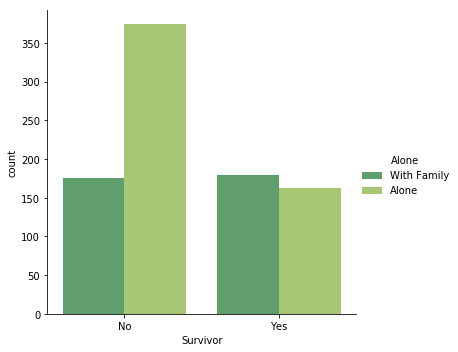

In [205]:
sns.catplot('Survivor',data = titanic_df, kind = 'count',hue = 'Alone', palette ='summer')